Nama   : Uswatun Hasanah

Nim    : 11220940000053

# Install dan Import Library

Dalam studi ini, peneliti ingin menguji apakah status sosial ekonomi orang tua berpengaruh terhadap nilai akademik siswa. Untuk keperluan analisis, peneliti membuat contoh kasus dengan menggunakan data yang dihasilkan secara acak (random). Status ekonomi orang tua diklasifikasikan ke dalam tiga kelompok, yaitu ekonomi rendah, menengah, dan tinggi. Selanjutnya, nilai siswa pada mata pelajaran Matematika, IPA, dan Bahasa Indonesia dibandingkan antar ketiga kelompok tersebut untuk melihat adanya perbedaan nilai berdasarkan status sosial ekonomi.

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

##Manova

#Data generate random

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)  # supaya hasilnya bisa diulang

# Data 15 siswa per kelompok
kelompok = ['Ekonomi Rendah']*15 + ['Ekonomi Menengah']*15 + ['Ekonomi Tinggi']*15

# Nilai Matematika, dibulatkan dan dibatasi 0-100
nilai_mtk = np.random.normal(60, 10, 45).round().astype(int)
nilai_mtk = np.clip(nilai_mtk, 0, 100)

# Nilai IPA
nilai_ipa = np.random.normal(65, 10, 45).round().astype(int)
nilai_ipa = np.clip(nilai_ipa, 0, 100)

# Nilai Bahasa Indonesia
nilai_bindo = np.random.normal(70, 10, 45).round().astype(int)
nilai_bindo = np.clip(nilai_bindo, 0, 100)

# Buat DataFrame
data_manova = pd.DataFrame({
    'Kelompok': kelompok,
    'Nilai_Matematika': nilai_mtk,
    'Nilai_IPA': nilai_ipa,
    'Nilai_Bahasa_Indonesia': nilai_bindo
})

print(data_manova)

            Kelompok  Nilai_Matematika  Nilai_IPA  Nilai_Bahasa_Indonesia
0     Ekonomi Rendah                65         58                      71
1     Ekonomi Rendah                59         60                      80
2     Ekonomi Rendah                66         76                      63
3     Ekonomi Rendah                75         68                      67
4     Ekonomi Rendah                58         47                      66
5     Ekonomi Rendah                58         68                      55
6     Ekonomi Rendah                76         61                      73
7     Ekonomi Rendah                68         58                      73
8     Ekonomi Rendah                55         71                      70
9     Ekonomi Rendah                65         75                      68
10    Ekonomi Rendah                55         74                      56
11    Ekonomi Rendah                55         57                      66
12    Ekonomi Rendah                62

#Uji Normalitas Multivariat

In [ ]:
data_Rendah= data_manova.loc[data_manova['Kelompok']=='Ekonomi Rendah', ['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']]
data_Menengah = data_manova.loc[data_manova['Kelompok']=='Ekonomi Menengah', ['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']]
data_Tinggi = data_manova.loc[data_manova['Kelompok']=='Ekonomi Tinggi', ['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']]

In [ ]:
print('uji normalitas multivariat Ekonomi Rendah: ', pg.multivariate_normality(data_Rendah, alpha=0.05))
print('uji normalitas multivariat Ekonomi Menengah: ', pg.multivariate_normality(data_Menengah, alpha=0.05))
print('uji normalitas multivariat Ekonomi Tinggi: ', pg.multivariate_normality(data_Tinggi, alpha=0.05))

uji normalitas multivariat Ekonomi Rendah:  HZResults(hz=np.float64(8.48760121967042), pval=np.float64(4.338697743575299e-29), normal=False)
uji normalitas multivariat Ekonomi Menengah:  HZResults(hz=np.float64(8.48760121967042), pval=np.float64(4.338697743575299e-29), normal=False)
uji normalitas multivariat Ekonomi Tinggi:  HZResults(hz=np.float64(8.48760121967042), pval=np.float64(4.338697743575299e-29), normal=False)


karena pada ketiga data memiliki nilai p-value< 0.05, maka tolak H0 sehingga dapat disimpulkan data tidak berdistribusi normal multivariat. selanjutnya dilakukan transformasi pada data.

In [ ]:
#Transformasi
data_Rendah_trans = np.sqrt(data_Rendah)
data_Menengah_trans = np.sqrt(data_Menengah)
data_Tinggi_trans = np.sqrt(data_Tinggi)

In [ ]:
print('uji normalitas multivariat Ekonomi Rendah: ', pg.multivariate_normality(data_Rendah_trans, alpha=0.05))
print('uji normalitas multivariat Ekonomi Menengah: ', pg.multivariate_normality(data_Menengah_trans, alpha=0.05))
print('uji normalitas multivariat Ekonomi Tinggi: ', pg.multivariate_normality(data_Tinggi_trans, alpha=0.05))

uji normalitas multivariat Ekonomi Rendah:  HZResults(hz=np.float64(0.5189171608949689), pval=np.float64(0.5252585399896085), normal=True)
uji normalitas multivariat Ekonomi Menengah:  HZResults(hz=np.float64(0.4853756303871736), pval=np.float64(0.6297026456111352), normal=True)
uji normalitas multivariat Ekonomi Tinggi:  HZResults(hz=np.float64(0.40099501970110796), pval=np.float64(0.863499362333881), normal=True)


Setelah data diransformasi dilakukan uji normalisasi kembali, sehingga pada ketiga data didapat nilai p-value>0.05, maka terima H0. Sehingga dapat disimpulkan data berdistribusi normal multivariat.

#Uji Homogenitas

In [ ]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_Rendah_trans, data_Menengah_trans, data_Tinggi_trans])
data_trans_manova['Kelompok'] = data_manova['Kelompok'].copy()
data_trans_manova

,Nilai_Matematika,Nilai_IPA,Nilai_Bahasa_Indonesia,Kelompok
0,8.062258,7.615773,8.426150,Ekonomi Rendah
1,7.681146,7.745967,8.944272,Ekonomi Rendah
2,8.124038,8.717798,7.937254,Ekonomi Rendah
3,8.660254,8.246211,8.185353,Ekonomi Rendah
4,7.615773,6.855655,8.124038,Ekonomi Rendah
5,7.615773,8.246211,7.416198,Ekonomi Rendah
6,8.717798,7.810250,8.544004,Ekonomi Rendah
7,8.246211,7.615773,8.544004,Ekonomi Rendah
8,7.416198,8.426150,8.366600,Ekonomi Rendah
9,8.062258,8.660254,8.246211,Ekonomi Rendah


In [ ]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia'], group='Kelompok')

,Chi2,df,pval,equal_cov
box,17.176948,12.0,0.143061,True


Karena nilai p-value = 0,143061>0,05 maka terima H0, sehingga dapat disimpulkan bahwa matriks variansi kovariansi homogen.

## MANOVA


In [ ]:
manova_model = MANOVA.from_formula('Nilai_Matematika + Nilai_IPA + Nilai_Bahasa_Indonesia ~ Kelompok', data=data_trans_manova)
manova_result = manova_model.mv_test()
print(manova_result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0030 3.0000 40.0000 4428.8442 0.0000
         Pillai's trace   0.9970 3.0000 40.0000 4428.8442 0.0000
 Hotelling-Lawley trace 332.1633 3.0000 40.0000 4428.8442 0.0000
    Roy's greatest root 332.1633 3.0000 40.0000 4428.8442 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Kelompok        Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.9159 6.0000 80.0000  0.5986 0.7306
             Pillai's trace 0.0849 6.0000 82.

Pada kasus ini,dari 4 statistik tersebut sama-sama memiliki p-value>0.055, artinya terima H0. Maka dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan antara kelompok ekonomi terhadap nilai akademik siswa.

##Uji Post Hoc

Disini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar ke-3nya

In [ ]:
tukey_Nilai_Matematika = pg.pairwise_tukey(data=data_trans_manova, dv='Nilai_Matematika', between='Kelompok')
print("Tukey Post-hoc untuk variabel Nilai Matematika")
tukey_Nilai_Matematika

Tukey Post-hoc untuk variabel Nilai Matematika


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ekonomi Menengah,Ekonomi Rendah,7.480141,7.724578,-0.244438,0.226399,-1.079676,0.531789,-0.404581
1,Ekonomi Menengah,Ekonomi Tinggi,7.480141,7.538921,-0.058780,0.226399,-0.259631,0.963555,-0.094839
2,Ekonomi Rendah,Ekonomi Tinggi,7.724578,7.538921,0.185657,0.226399,0.820045,0.692816,0.271080


In [ ]:
tukey_Nilai_IPA = pg.pairwise_tukey(data=data_trans_manova, dv='Nilai_IPA', between='Kelompok')
print("Tukey Post-hoc untuk variabel Nilai IPA")
tukey_Nilai_IPA

Tukey Post-hoc untuk variabel Nilai IPA


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ekonomi Menengah,Ekonomi Rendah,8.063345,8.058178,0.005167,0.222947,0.023174,0.999704,0.007769
1,Ekonomi Menengah,Ekonomi Tinggi,8.063345,8.037688,0.025657,0.222947,0.115083,0.992726,0.038667
2,Ekonomi Rendah,Ekonomi Tinggi,8.058178,8.037688,0.020491,0.222947,0.091909,0.995354,0.037486


In [ ]:
tukey_Nilai_Bahasa_Indonesia = pg.pairwise_tukey(data=data_trans_manova, dv='Nilai_Bahasa_Indonesia', between='Kelompok')
print("Tukey Post-hoc untuk variabel Nilai Bahasa Indonesia")
tukey_Nilai_Bahasa_Indonesia

Tukey Post-hoc untuk variabel Nilai Bahasa Indonesia


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Ekonomi Menengah,Ekonomi Rendah,8.510502,8.176467,0.334035,0.208082,1.605308,0.254640,0.617724
1,Ekonomi Menengah,Ekonomi Tinggi,8.510502,8.250705,0.259797,0.208082,1.248534,0.431870,0.395146
2,Ekonomi Rendah,Ekonomi Tinggi,8.176467,8.250705,-0.074238,0.208082,-0.356774,0.932356,-0.134557


Berdasarkan hasil uji Post Hoc, karena masing-masing memiliki p-value>0.05, artinya terima H0. Sehingga dapat disimpulkan bahwa tidak terdapat perbedaan signifikan antara masing"pasangan kelompok status sosial ekonomi baik untuk nilai Matematika, IPA, maupun Bahasa Indonesia.

## Visualisasi Data

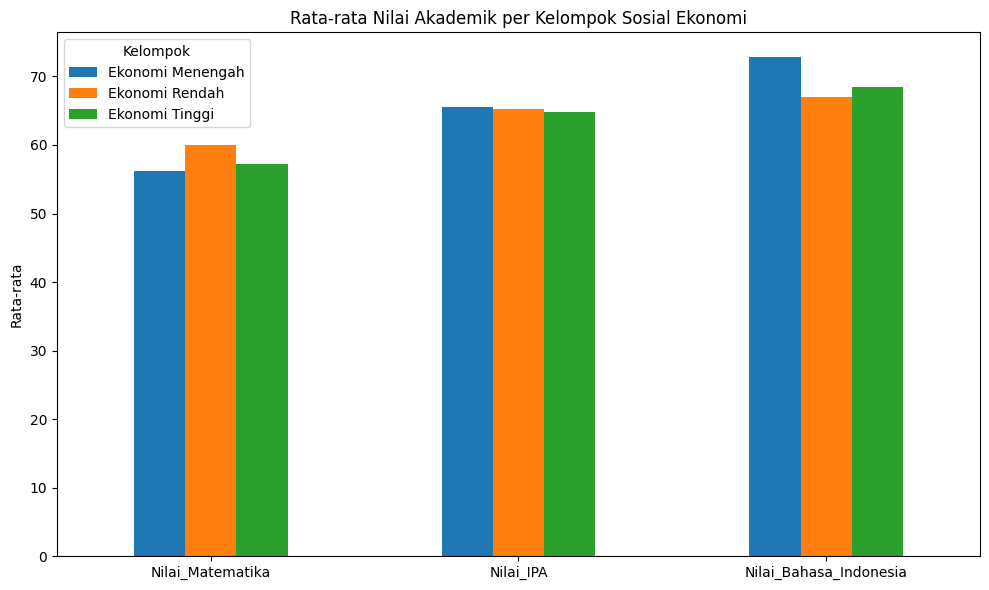

In [ ]:
data_manova.groupby('Kelompok')[['Nilai_Matematika', 'Nilai_IPA', 'Nilai_Bahasa_Indonesia']].mean().T.plot(
    kind='bar', figsize=(10, 6)  # Tambahkan ukuran figure
)
plt.title('Rata-rata Nilai Akademik per Kelompok Sosial Ekonomi')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.tight_layout()  # Supaya layout lebih rapi dan tidak terpotong
plt.show()

Visualisasi diatas menunjukkan bahwa rata-rata nilai Matematika, IPA, dan Bahasa Indonesia siswa tidak berbeda secara signifikan antar kelompok status sosial ekonomi orang tua. Meskipun terlihat adanya perbedaan kecil, seperti siswa dari kelompok ekonomi rendah yang sedikit lebih unggul pada nilai Matematika, serta kelompok ekonomi menengah yang sedikit lebih unggul pada nilai Bahasa Indonesia, perbedaan tersebut tidak cukup besar secara statistik untuk dianggap signifikan. Untuk mata pelajaran IPA, rata-rata nilai ketiga kelompok hampir sama. Dengan demikian, dapat disimpulkan bahwa status sosial ekonomi orang tua tidak berpengaruh signifikan terhadap nilai akademik siswa. Hasil ini sejalan dengan analisis MANOVA yang juga menunjukkan tidak adanya perbedaan yang signifikan secara statistik.



##Kesimpulan
Berdasarkan hasil analisis MANOVA, menunjukkan bahwa tidak terdapat perbedaan yang signifikan antara kelompok status sosial ekonomi orang tua terhadap nilai Matematika, IPA dan Bahasa Indonesia siswa. Selanjutnya hasil uji Post Hoc juga menunjukkan bahwa tidak terdapat perbedaan signifikan antara setiap pasangan kelompok ekonomi baik berdasarkan nilai Matematika, IPA, maupun Bahasa Indonesia.  Sehingga dapat disimpulkan bahwa status sosial ekonomi orang tua tidak berpengaruh signifikan terhadap nilai siswa pada mata
pelajaran Matematika, IPA, dan Bahasa Indonesia dalam penelitian ini.